In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from textwrap import wrap

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
citylat = np.random.uniform(low=-90.0, high=90.0, size=1200)
citylng = np.random.uniform(low=-180.0, high=180.0, size=1200)

#Creating randomly distributed coordinate pairs for lat and lng

coordinates = []
coordinates = list(zip(citylat, citylng))

#List to store coordinates, zip lat & lng to create the pair
#List to store the cities

cities = []

for pair in coordinates:
    city = citipy.nearest_city(pair[0], pair[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)
    
#Length of the cities list changes according to the random fuction, does it have a lower bound?


515

In [3]:
weatherurl = f"http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weatherurl}appid={weather_api_key}&units={units}&q="

city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
tempdata = []
humiditydata = []
cloudsdata = []
wind_speeddata = []


for city in cities:
    response_json = requests.get(query_url + city).json()
    
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        tempdata.append(temp)

        humidity = response_json['main']['humidity']
        humiditydata.append(humidity)

        clouds = response_json['clouds']['all']
        cloudsdata.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speeddata.append(wind_speed)
        
        print(f"City Name: {city}, City ID: {city_id}")

        
    except:
        
        print("Request be bunk yo")
            

    


City Name: hualmay, City ID: 3939761
City Name: saskylakh, City ID: 2017155
City Name: kamiiso, City ID: 2129766
City Name: lebu, City ID: 3883457
City Name: butaritari, City ID: 2110227
Request be bunk yo
City Name: punta arenas, City ID: 3874787
City Name: bredasdorp, City ID: 1015776
City Name: mount gambier, City ID: 2156643
City Name: takaka, City ID: 2181997
City Name: mataura, City ID: 6201424
City Name: tiznit, City ID: 2527087
City Name: forrest city, City ID: 4111382
City Name: busselton, City ID: 2075265
City Name: chokurdakh, City ID: 2126123
City Name: puerto escondido, City ID: 3520994
City Name: atar, City ID: 2381334
City Name: rikitea, City ID: 4030556
City Name: vaini, City ID: 4032243
City Name: bosaso, City ID: 64013
City Name: sfantu gheorghe, City ID: 667303
City Name: georgetown, City ID: 1735106
City Name: ushuaia, City ID: 3833367
City Name: port lincoln, City ID: 2063036
City Name: jawor, City ID: 3097367
City Name: cherskiy, City ID: 2126199
City Name: new no

In [4]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Latitude": lat_list, "Longitude": lng_list,
                         "Temperature": tempdata, "Humidity": humiditydata, "Clouds": cloudsdata,
                         "Wind Speed": wind_speeddata})

cities_df = cities_df.set_index("City ID")
cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
City ID,,,,,,,,
3939761,Hualmay,PE,-11.0964,-77.6139,71.35,80,100,10.45
2017155,Saskylakh,RU,71.9167,114.0833,-31.54,100,6,2.04
2129766,Kamiiso,JP,41.8167,140.6500,32.38,86,75,29.93
3883457,Lebu,CL,-37.6167,-73.6500,56.91,90,0,7.52
2110227,Butaritari,KI,3.0707,172.7902,82.13,75,54,15.97


In [5]:
cities_df = cities_df.reset_index()
#Reset index for CSV writing

In [6]:
cities_df.to_csv("city_weather.csv", index=False, header=True)

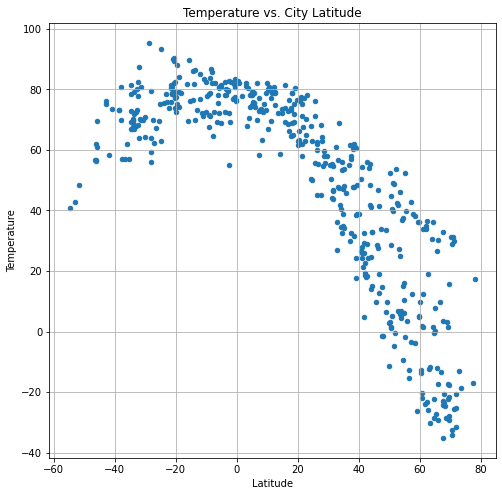

In [34]:
cities_df.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8), 
               title="Temperature vs. City Latitude")
plot.savefig('temp_vs_lat')
plot.show()


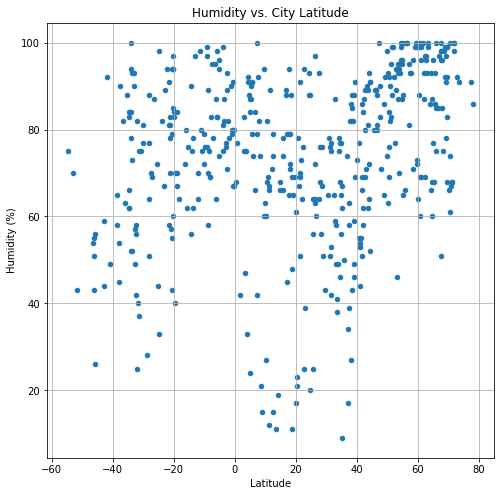

In [33]:

cities_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8), 
               title="Humidity vs. City Latitude")

plot.ylabel('Humidity (%)')
plot.savefig('hum_vs_lat')
plot.show()


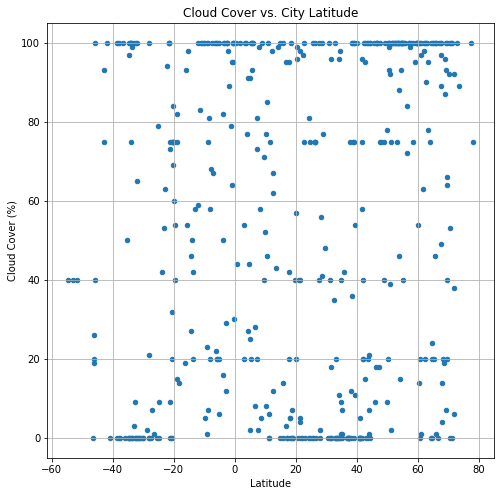

In [32]:
cities_df.plot(kind="scatter", x="Latitude", y="Clouds", grid=True, figsize=(8,8), 
               title="Cloud Cover vs. City Latitude")

plot.ylabel('Cloud Cover (%)')
plot.savefig('cloud_vs_lat')
plot.show()


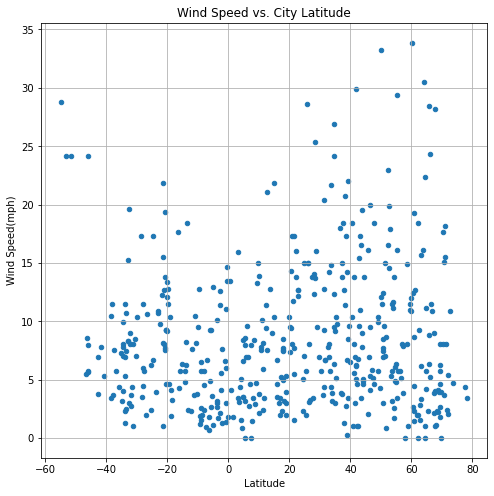

<Figure size 432x288 with 0 Axes>

In [31]:
cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed",grid=True, figsize=(8,8), 
               title="Wind Speed vs. City Latitude")

plot.ylabel('Wind Speed(mph)')
plot.show()
plot.savefig('wind_spd_vs_lat')

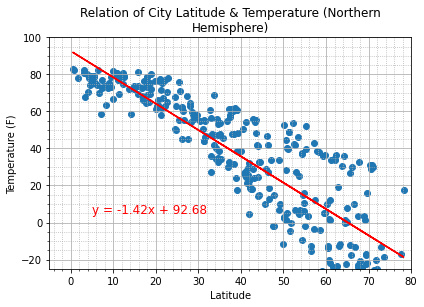

The r-squared is: 0.7648761804558685


In [30]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(5,5),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Temperature (F)')
plot.ylim(-25, 100)
plot.xlim(-5, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Temperature (Northern Hemisphere)", 60)))
plot.savefig('north_temp_lat.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")

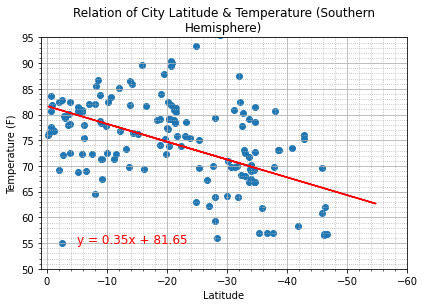

The r-squared is: 0.2613576099441617


In [29]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-5,55),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Temperature (F)')
plot.ylim(50, 95)
plot.xlim(1, -60)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Temperature (Southern Hemisphere)", 60)))
plot.savefig('south_temp_lat.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")


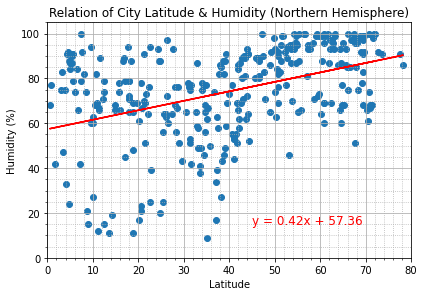

The r-squared is: 0.1710482881065956


In [28]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(45,15),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Humidity (%)')
plot.ylim(0, 105)
plot.xlim(0, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Humidity (Northern Hemisphere)", 60)))
plot.savefig('north_hum_lat.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")

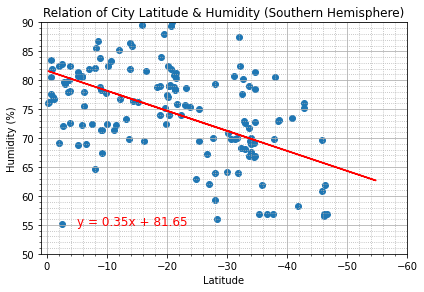

The r-squared is: 0.2613576099441617


In [27]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-5,55),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Humidity (%)')
plot.ylim(50, 90)
plot.xlim(1, -60)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Humidity (Southern Hemisphere)", 60)))
plot.savefig('south_hum_lat.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")

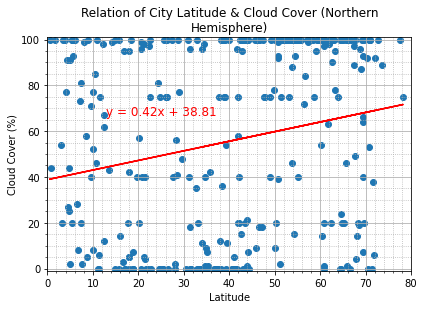

The r-squared is: 0.042966185354600735


In [26]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(13,67),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Cloud Cover (%)')
plot.ylim(-1, 101)
plot.xlim(0, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Cloud Cover (Northern Hemisphere)", 60)))
plot.savefig('north_cloud_lat.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")

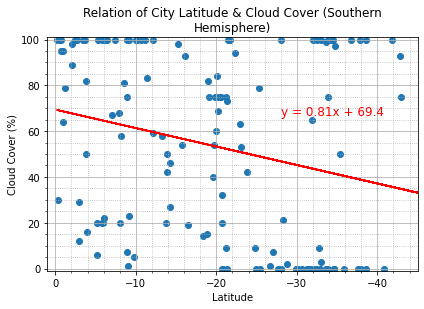

The r-squared is: 0.07528446734118237


In [25]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-28,67),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Cloud Cover (%)')
plot.ylim(-1, 101)
plot.xlim(1, -45)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Cloud Cover (Southern Hemisphere)", 60)))
plot.savefig('south_cloud_lat.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")

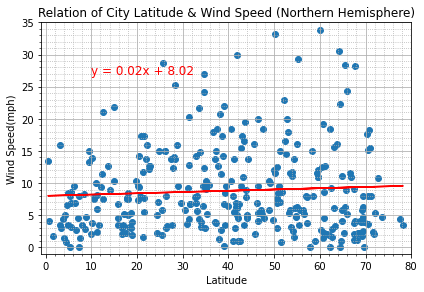

The r-squared is: 0.0037969632240362054


In [24]:
filter = cities_df['Latitude'] > 0
northern_hemi = cities_df[filter]
southern_hemi = cities_df[~filter]

x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(10,27),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Wind Speed(mph)')
plot.ylim(-1, 35)
plot.xlim(-1, 80)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Wind Speed (Northern Hemisphere)", 60)))
plot.savefig('north_lat_wind.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")

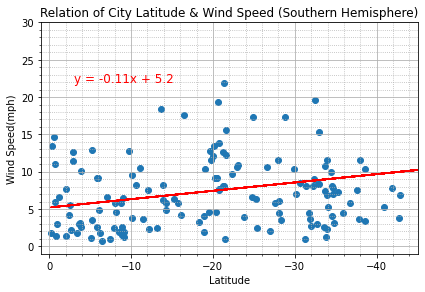

The r-squared is: 0.08301713951610633


In [23]:

x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = pearsonr(x_values, y_values)

plot.scatter(x_values,y_values)
plot.plot(x_values,regress_values,"r-")
plot.annotate(line_eq,(-3,22),fontsize=12,color="red")
plot.xlabel('Latitude')
plot.ylabel('Wind Speed(mph)')
plot.ylim(-1, 30)
plot.xlim(1, -45)
plot.minorticks_on()
plot.grid(which='major', linestyle='-')
plot.grid(which='minor', linestyle=':')
plot.tight_layout()

plot.title("\n".join(wrap("Relation of City Latitude & Wind Speed (Southern Hemisphere)", 60)))
plot.savefig('south_lat_wind.png')
plot.show()
print(f"The r-squared is: {rvalue**2}")